In [1]:
# Import statements and setup matplotlib for jupyter
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Load data into a dataframe
url = 'https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter07/letterdata.csv'
df = pd.read_csv(url)

In [3]:
# class Model(nn.Module):
#     # Create ANN architecture. 16 input nodes, 3 hidden layers of 50 nodes, output player of 26 nodes
#     def __init__(self, input_features=16, h1=50, h2=50, h3=50, h4=50, output_features=26):
#         super().__init__()
#         self.fc1 = nn.Linear(input_features, h1)
#         self.fc2 = nn.Linear(h1, h2)
#         self.fc3 = nn.Linear(h2, h3)
#         self.fc4 = nn.Linear(h3, h4)
#         self.out = nn.Linear(h4, output_features)

#     #Feed forward function
#     def forward(self, x):
#         # Using the exponential linear unit activation function
#         x = F.elu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = F.elu(self.fc3(x))
#         x = F.relu(self.fc4(x))
#         x = self.out(x)
#         return x

In [4]:
class Model(nn.Module):
    # Create ANN architecture. 16 input nodes, 3 hidden layers of 50 nodes, output player of 26 nodes
    def __init__(self, input_features=16, h1=60, h2=60, output_features=26):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)

    #Feed forward function
    def forward(self, x):
        # Using the exponential linear unit activation function
        x = F.elu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [5]:
# Set seed for reproducible results
torch.manual_seed(100)
model = Model()

In [6]:
# Preview data format
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
#Scale all numeric values into a small range. We will use min-max scaling.
# df_numeric = df.drop(columns=["letter"])
# min_max_scalar = preprocessing.MinMaxScaler()
# df_numeric_minmax = min_max_scalar.fit_transform(df_numeric)
# df_numeric_minmax = pd.DataFrame(df_numeric_minmax)
# df_numeric_minmax.insert(0, "letter", df["letter"])
# df = df_numeric_minmax

# df_normalized = df.drop(columns=['letter'])
# df_normalized = preprocessing.normalize(df_normalized, norm='l2')
# df_normalized = pd.DataFrame(df_normalized)
# df_normalized.insert(0, "letter", df["letter"])
# df = df_normalized
# df

In [8]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_dropped = df.drop(columns=['letter'])
# print(scaler.fit(df_dropped))
# print(scaler.mean_)
# print(scaler.transform(df_dropped))
# df_dropped = pd.DataFrame(scaler.transform(df_dropped))
# df_dropped.insert(0, "letter", df["letter"])
# df = df_dropped

In [9]:
# Replace each character in the letter column with a numeric value for compatability
chars=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
i = 0.0
for j in chars:
    df['letter'] = df['letter'].replace(j, i)
    i +=1
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19.0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8.0,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3.0,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13.0,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6.0,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:
# Seperate predictors (X) and labels (y) 
X = df.drop('letter', axis=1)
y = df['letter']

X = X.values
y = y.values

In [11]:
# Split data into an 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=800)

# Set tensor accuracy
# In the future set up for GPU processing using cuda
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
# Measure the error and select optimization method with a learning rate of 0.001
# Higher lr of 0.05 was resulting in overfitting at high epochs
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Text(0.5, 0, 'Epoch')

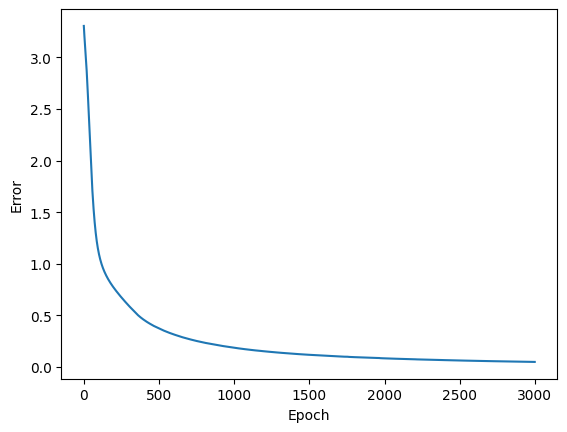

In [13]:
#Train the model
epochs = 3000
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train) 
    #Measure error
    loss = criterion(y_pred, y_train) 
    losses.append(loss.detach().numpy())

    # Setup back propagation for tuning weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Graph the rate of error at each epoch
plt.plot(range(epochs), losses)
plt.ylabel("Error")
plt.xlabel('Epoch')

In [14]:
# Calculate accuracy
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        # Make predictions using test data
        y_val = model.forward(data)

        # Check how many are correct
        if y_val.argmax().item() == y_test[i]:
            correct += 1
percent = correct/y_test.shape[0] * 100
print(f'{correct} / {y_test.shape[0]} = {percent}%')

3767 / 4000 = 94.175%


In [15]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        #Letter classifier prediction
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        #Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} correct')

1.) tensor([ -6.4929, -22.2117,   6.9413,  11.0579, -12.1885, -27.1956,  14.0766,
         -9.0707,  23.1597,  17.0616,  -7.8709,  -9.7707, -35.3157,  -2.2215,
        -15.2926, -13.2109, -13.7103, -82.9397,  32.9017,   2.4917,   6.4497,
        -30.6354, -96.1663,  15.5346,   2.3061,  -3.1841]) 	 18 	 18
2.) tensor([ -8.1406,   7.7246, -16.5732,  -7.4996,  11.2244,   8.1825, -15.7252,
         -2.8872,   1.6956,   8.0856,   5.4369,   6.7029, -18.9065, -13.0313,
        -36.7532,  -1.4069, -11.2543,   6.1581,  12.9724,   0.0687, -19.8423,
          0.5825, -39.0860,  21.1101,  -6.3212, -13.8161]) 	 23 	 23
3.) tensor([-16.9821, -28.2231,  26.9827,  -7.5113,  19.7620, -19.3343,  37.0694,
          8.5078,  14.7336, -20.5868,  16.3891,  14.0923, -19.6829, -19.7614,
         17.2540,   5.1396,   1.4363, -18.5640,   4.7146, -13.7392,  -9.7362,
        -18.9905, -60.0352,  -1.9778, -34.5315, -28.0483]) 	 6 	 6
4.) tensor([-14.1434,  17.0093, -11.7597,   0.2813,  22.9572,  -9.0345,   0.5228,

In [16]:
print(chars[14])

O


In [17]:
print(chars[6])

G
